In [51]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [29]:
start= "2010-01-01"
end= "2024-01-01"

df=yf.download('NVDA', start, end)
df.head

[*********************100%***********************]  1 of 1 completed


<bound method NDFrame.head of                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-01-04   0.462750   0.465500   0.452750   0.462250   0.423952  800204000
2010-01-05   0.460500   0.474000   0.460500   0.469000   0.430143  728648000
2010-01-06   0.468750   0.473000   0.464250   0.472000   0.432894  649168000
2010-01-07   0.469500   0.471500   0.459250   0.462750   0.424410  547792000
2010-01-08   0.459000   0.467000   0.456250   0.463750   0.425328  478168000
...               ...        ...        ...        ...        ...        ...
2023-12-22  49.195000  49.382999  48.466999  48.830002  48.819527  252507000
2023-12-26  48.967999  49.599998  48.959999  49.278999  49.268425  244200000
2023-12-27  49.511002  49.680000  49.084999  49.417000  49.406395  233648000
2023-12-28  49.643002  49.883999  49.411999  49.521999  49.511375  246587000
2023-12-29  49.813000  49.997002  48.750999  4

In [30]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,49.195000,49.382999,48.466999,48.830002,48.819527,252507000
2023-12-26,48.967999,49.599998,48.959999,49.278999,49.268425,244200000
2023-12-27,49.511002,49.680000,49.084999,49.417000,49.406395,233648000
2023-12-28,49.643002,49.883999,49.411999,49.521999,49.511375,246587000
2023-12-29,49.813000,49.997002,48.750999,49.521999,49.511375,389293000


In [31]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,0.46275,0.4655,0.45275,0.46225,0.423952,800204000
1,2010-01-05,0.46050,0.4740,0.46050,0.46900,0.430143,728648000
2,2010-01-06,0.46875,0.4730,0.46425,0.47200,0.432894,649168000
3,2010-01-07,0.46950,0.4715,0.45925,0.46275,0.424410,547792000
4,2010-01-08,0.45900,0.4670,0.45625,0.46375,0.425328,478168000


In [33]:
df= df.drop(['Date', 'Adj Close'], axis =1)
df.head

<bound method NDFrame.head of            Open       High        Low      Close     Volume
0      0.462750   0.465500   0.452750   0.462250  800204000
1      0.460500   0.474000   0.460500   0.469000  728648000
2      0.468750   0.473000   0.464250   0.472000  649168000
3      0.469500   0.471500   0.459250   0.462750  547792000
4      0.459000   0.467000   0.456250   0.463750  478168000
...         ...        ...        ...        ...        ...
3517  49.195000  49.382999  48.466999  48.830002  252507000
3518  48.967999  49.599998  48.959999  49.278999  244200000
3519  49.511002  49.680000  49.084999  49.417000  233648000
3520  49.643002  49.883999  49.411999  49.521999  246587000
3521  49.813000  49.997002  48.750999  49.521999  389293000

[3522 rows x 5 columns]>

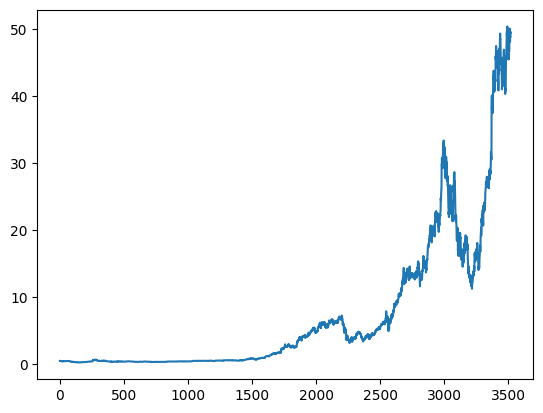

In [35]:
plt.plot(df.Close)

In [38]:
ma100= df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3517    45.58356
3518    45.63120
3519    45.67857
3520    45.71962
3521    45.76820
Name: Close, Length: 3522, dtype: float64

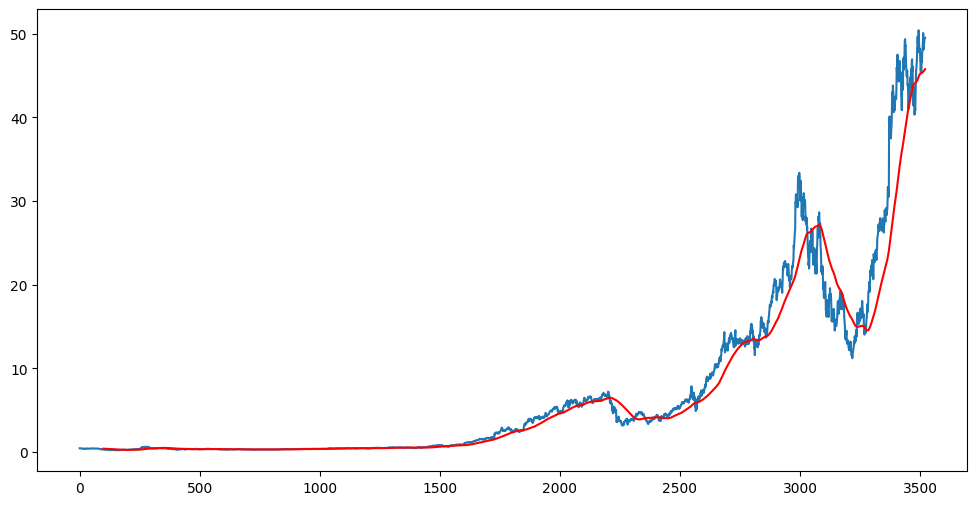

In [39]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [40]:
ma200 = df.Close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3517    40.079690
3518    40.211260
3519    40.343515
3520    40.470810
3521    40.597280
Name: Close, Length: 3522, dtype: float64

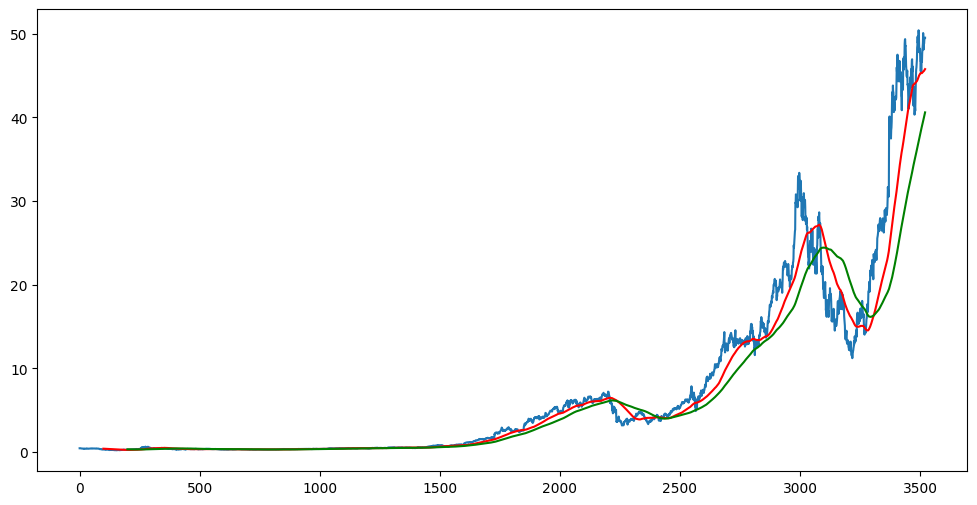

In [41]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [42]:
df.shape

(3522, 5)

Splitting data into trainig and Testing

In [43]:
data

<module 'pandas_datareader' from 'c:\\Users\\arkad\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\pandas_datareader\\__init__.py'>

In [46]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2817, 1)
(705, 1)


In [47]:
data_training.head()

,Close
0,0.46225
1,0.46900
2,0.47200
3,0.46275
4,0.46375


In [49]:
data_testing.head()

,Close
2817,13.19125
2818,13.29125
2819,13.34125
2820,12.72250
2821,12.84575


Scaling the Data

In [52]:
scaler=MinMaxScaler(feature_range=(0,1))

In [55]:
data_training_array =scaler.fit_transform(data_training)
data_training_array

array([[0.01590191],
       [0.01634868],
       [0.01654725],
       ...,
       [0.8105671 ],
       [0.84533284],
       [0.83623187]])

In [ ]:
X_train=[]
Y_train=[]